<a href="https://colab.research.google.com/github/ClausGB/Calculo_Aplicado/blob/main/reglinago25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Escuela Superior de Cómputo
##Modelado predictivo
###Claudia García-Blanquel

###Importar las librerias

In [ ]:
# Práctica: Regresión
# Análisis Teórico y Práctico de Regresión Lineal Simple y Múltiple
# Autor: Claudia García-Blanquel
# Fecha: Septiembre 2025

# =============================================================================
# LIBRERÍAS NECESARIAS
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing


In [ ]:
# Configuración de gráficos
plt.style.use('default')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Práctiva de Regresión")
print("=" * 60)


Práctiva de Regresión


#Importar el dataset



In [ ]:
# Cargar dataset de precios de viviendas en California
housing = fetch_california_housing()
#Establecer las variables dependientes y independientes
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
feature_names_housing = housing.feature_names

# Crear DataFrame para mejor manipulación
df_housing = pd.DataFrame(X, columns=feature_names_housing)
df_housing['target'] = y

print(f"Dataset Housing: {X.shape[0]} muestras, {X.shape[1]} características")
print(f"Características: {feature_names_housing}")
print(f"Dataset Housing: {y.shape[0]} muestras")

Dataset Housing: 20640 muestras, 8 características
Características: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset Housing: 20640 muestras


In [ ]:
# Estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas (Dataset Housing):")
print(df_housing.describe().round(2))


📈 Estadísticas Descriptivas (Dataset Housing):
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude    target  
count  20640.00   20640.00  20640.00  
mean      35.63    -119.57      2.07  
std        2.14       2.00      1.15  
min       32.54    -124.35      0.15  
25%       33.93    -121.80      1.20  
50%       34.26    -118.49      1.80  
75%       37.71    -118.01    

#Explorar el dataset


🔍 2. ANÁLISIS EXPLORATORIO DE DATOS
----------------------------------------
📊 Análisis Exploratorio - Dataset Housing:


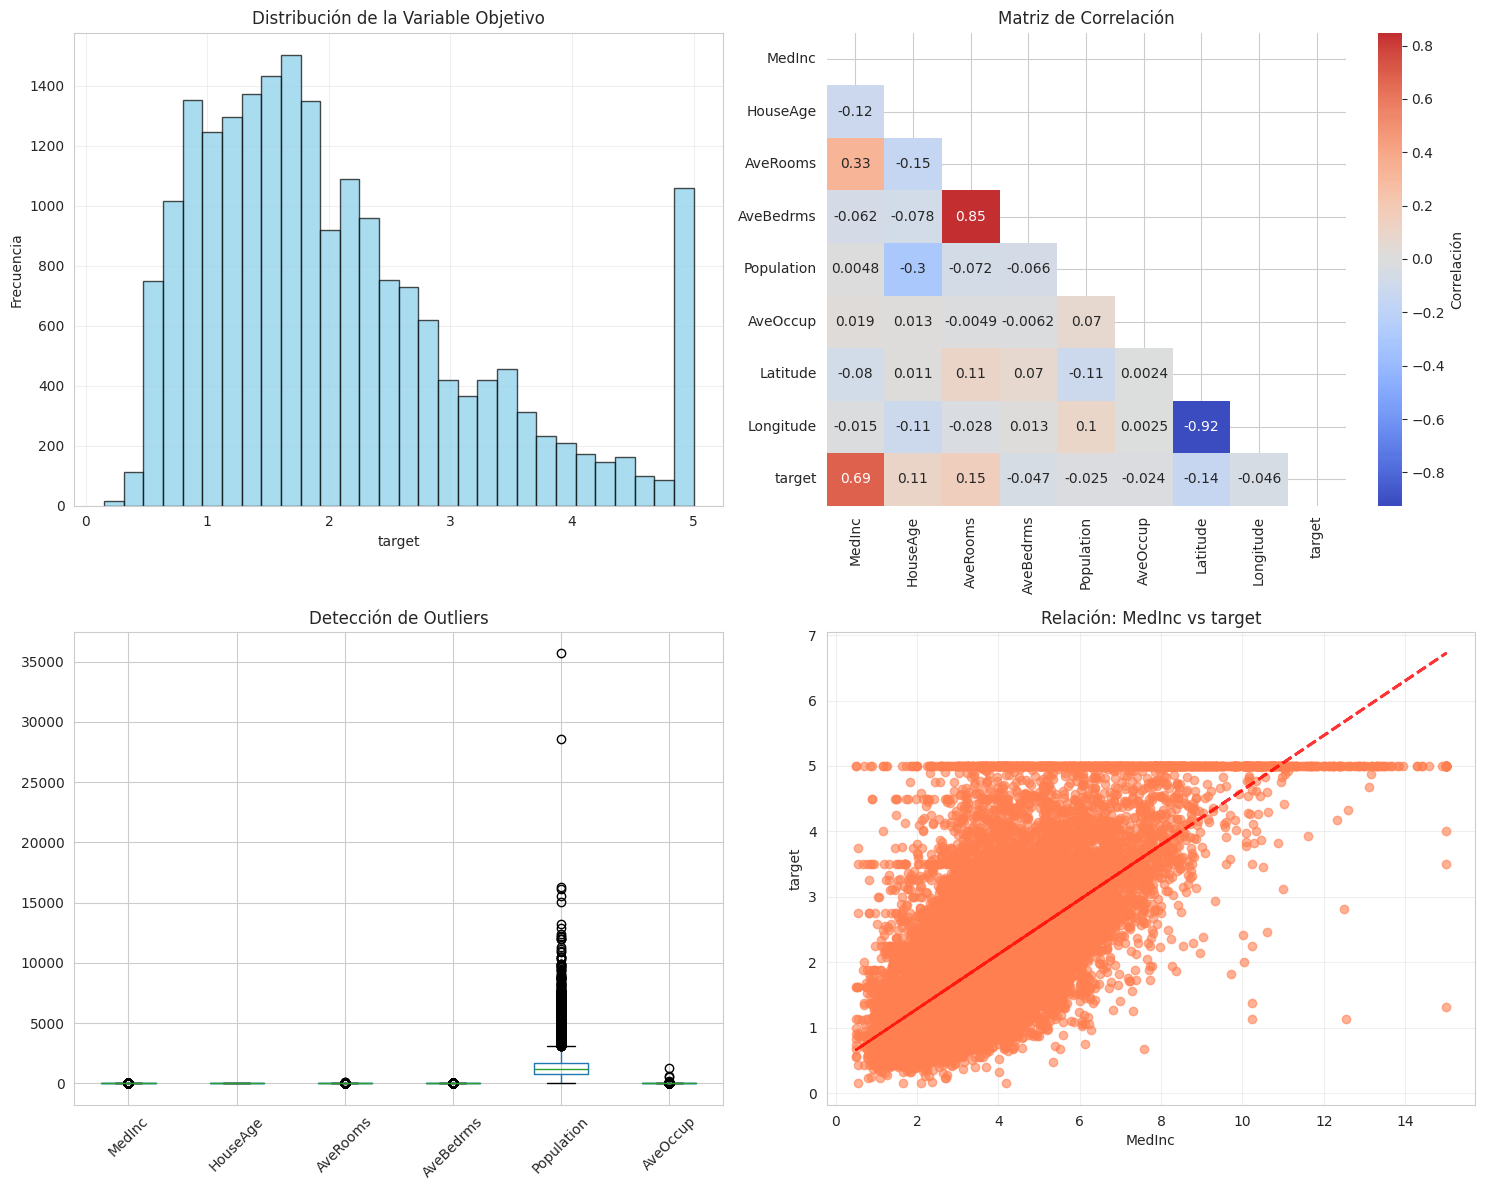


Características más correlacionadas con el objetivo:
MedInc       0.688
AveRooms     0.152
Latitude     0.144
HouseAge     0.106
AveBedrms    0.047
Name: target, dtype: float64


In [ ]:
print("\n🔍 2. ANÁLISIS EXPLORATORIO DE DATOS")
print("-" * 40)

def plot_eda(df, target_col='target'):
    """
    Realiza análisis exploratorio visual
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Distribución de la variable objetivo
    axes[0, 0].hist(df[target_col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribución de la Variable Objetivo')
    axes[0, 0].set_xlabel(target_col)
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].grid(True, alpha=0.3)

    # Matriz de correlación
    corr_matrix = df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, ax=axes[0, 1], cbar_kws={'label': 'Correlación'})
    axes[0, 1].set_title('Matriz de Correlación')

    # Boxplot para detectar outliers
    numeric_cols = df.select_dtypes(include=[np.number]).columns[:6]  # Primeras 6 columnas
    df[numeric_cols].boxplot(ax=axes[1, 0])
    axes[1, 0].set_title('Detección de Outliers')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Scatter plot de la característica más correlacionada
    correlations = df.corr()[target_col].abs().sort_values(ascending=False)
    best_feature = correlations.index[1]  # Excluir la variable objetivo misma

    axes[1, 1].scatter(df[best_feature], df[target_col], alpha=0.6, color='coral')
    axes[1, 1].set_xlabel(best_feature)
    axes[1, 1].set_ylabel(target_col)
    axes[1, 1].set_title(f'Relación: {best_feature} vs {target_col}')
    axes[1, 1].grid(True, alpha=0.3)

    # Línea de tendencia
    z = np.polyfit(df[best_feature], df[target_col], 1)
    p = np.poly1d(z)
    axes[1, 1].plot(df[best_feature], p(df[best_feature]), "r--", alpha=0.8, linewidth=2)

    plt.tight_layout()
    plt.show()

    return correlations

# Realizar EDA para dataset Housing
print("📊 Análisis Exploratorio - Dataset Housing:")
correlations_Housing = plot_eda(df_housing)
print(f"\nCaracterísticas más correlacionadas con el objetivo:")
print(correlations_Housing.iloc[1:6].round(3))

##Regresión Lineal

In [ ]:
# Seleccionar la característica más correlacionada para regresión simple
best_feature = correlations_Housing.index[1]
X_simple = df_housing[[best_feature]].values
y_simple = df_housing['target'].values

print(f"Variable seleccionada para regresión simple: {best_feature}")
print(f"Correlación with target: {correlations_Housing[best_feature]:.3f}")


Variable seleccionada para regresión simple: MedInc
Correlación with target: 0.688


###Dividir el dataset en entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.20, random_state=42)

# 3. División de datos
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"\n3. DIVISIÓN DE DATOS")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
#print(f"Validación: {X_val.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")



3. DIVISIÓN DE DATOS
Entrenamiento: 16512 muestras
Test: 4128 muestras


#Escalado de variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##Crear modelo RLS

In [ ]:
from sklearn.linear_model import LinearRegression
regresionLineal = LinearRegression()
regresionLineal.fit(X_train,y_train)

LinearRegression()

#
#Predecir el conjunto test

In [ ]:
y_pred = regresionLineal.predict(X_test)

In [ ]:
# Estadísticas del modelo
print(f"\n📊 Estadísticas del Modelo Simple:")
print(f"Intercepto (β₀): {regresionLineal.intercept_:.3f}")
print(f"Pendiente (β₁): {regresionLineal.coef_[0]:.3f}")

# Ecuación del modelo
print(f"\n Ecuación del Modelo:")
print(f"y = {regresionLineal.intercept_:.3f} + {regresionLineal.coef_[0]:.3f} * {best_feature}")


📊 Estadísticas del Modelo Simple:
Intercepto (β₀): -37.023
Pendiente (β₁): 0.449

 Ecuación del Modelo:
y = -37.023 + 0.449 * MedInc


In [ ]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error
)
# Métricas de evaluación
r2_simple = r2_score(y_test, y_pred)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred))
mae_simple = mean_absolute_error(y_test, y_pred)
print(f"\n📈 Métricas de Evaluación:")
print(f"R² Score: {r2_simple:.4f}")
print(f"RMSE: {rmse_simple:.4f}")
print(f"MAE: {mae_simple:.4f}")


📈 Métricas de Evaluación:
R² Score: -1166.3926
RMSE: 39.1122
MAE: 39.0978


#Visualizar los resultado del entrenamiento

ValueError: x and y must be the same size

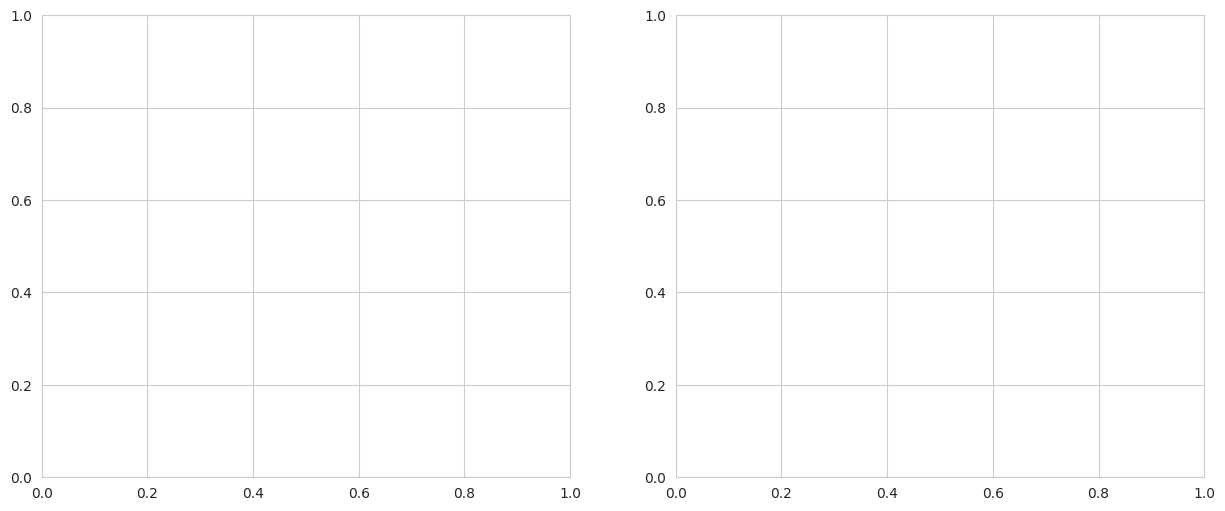

In [ ]:
# Visualización del modelo simple
def plot_simple_regression(X, y, X_test, y_test, y_pred, model, feature_name):
    """
    Visualiza regresión lineal simple
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico 1: Línea de regresión
    #ax1.scatter(X, y, alpha=0.6, color='lightblue', label='Datos de entrenamiento')
    #ax1.scatter(X_test, y_test, alpha=0.8, color='orange', label='Datos de prueba')

    # Línea de regresión
    #X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    #y_range_pred = model.predict(X_range)
    #ax1.plot(X_range, y_range_pred, 'r-', linewidth=2, label='Línea de regresión')

    ax1.set_xlabel(feature_name)
    ax1.set_ylabel('Target')
    ax1.set_title('Regresión Lineal Simple')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gráfico 2: Valores reales vs predichos
    ax2.scatter(y_test, y_pred, alpha=0.7, color='green')
    ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    ax2.set_xlabel('Valores Reales')
    ax2.set_ylabel('Valores Predichos')
    ax2.set_title('Valores Reales vs Predichos')
    ax2.grid(True, alpha=0.3)

    # Añadir R² al gráfico
    r2 = r2_score(y_test, y_pred)
    ax2.text(0.05, 0.95, f'R² = {r2:.4f}', transform=ax2.transAxes,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

plot_simple_regression(X_train, y_train, X_test,
                      y_test, y_pred, regresionLineal, best_feature)

In [ ]:
#=============================================================================
# 6. ANÁLISIS CON STATSMODELS (ESTADÍSTICAS AVANZADAS)
# =============================================================================
import statsmodels.api as sm

print("\n📈 6. ANÁLISIS ESTADÍSTICO AVANZADO")
print("-" * 40)

# Usar statsmodels para análisis más detallado
X_train_sm = sm.add_constant(X_train)  # Agregar constante para intercepto
X_test_sm = sm.add_constant(X_test)

# Ajustar modelo con statsmodels
Regression_OLS = sm.OLS(y_train, X_train).fit()

print("Resumen Estadístico Completo:")
print(Regression_OLS.summary())



📈 6. ANÁLISIS ESTADÍSTICO AVANZADO
----------------------------------------
Resumen Estadístico Completo:
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                          1.733e+04
Date:                Wed, 10 Sep 2025   Prob (F-statistic):                        0.00
Time:                        03:32:41   Log-Likelihood:                         -19199.
No. Observations:               16512   AIC:                                  3.841e+04
Df Residuals:                   16504   BIC:                                  3.848e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
             

In [ ]:
#CAlibrar el modelo

In [ ]:
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(X)
lm=sm.OLS(y,x).fit()

In [ ]:
  lm.predict(x)

In [ ]:
lm.summary()

In [ ]:
#Ecuación Lineak y =ax+b
y_pred = 9.1021 * x +(-34.6707)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
y =df_boston['Value']
x =df_boston['Rooms']
plt.figure(figsize=(6,4), tight_layout= True)
sns.scatterplot(x=x['Rooms'],y=y)
sns.lineplot(x=x['Rooms'],y=y_pred, color="red")
#axis
plt.xlim(0)
plt.ylim(0)
plt.savefig('LRS')
plt.show()